# Principal Component Analysis (PCA)

Steps for PCA :     
- Step 1 : Generate the dataset from bivariate normal distribution
- Step 2 : Visualize the dataset
- Step 3 : Center the dataset and visualize the differences in original & centered dataset
- Step 4 : Find the covariance matrix
- Step 5 : Find the eigenvalues & eigenvectors

## Import settings

In [207]:
import numpy as np
import matplotlib.pyplot as plt

In [208]:
rng = np.random.default_rng(seed = 42)

## Generate Dataset

Let us first gernerate dataset in 𝐑^2 by sampling points from a multi-variate normal distribution

In [209]:
n = 100
mu = np.array([2, 5])
cov = np.array([
    [1, 0.9],
    [0.9, 1]
])

X = rng.multivariate_normal(mu, cov, size = n).T
X.shape

(2, 100)

In [210]:
# STEP 1 : Generate Dataset

def generate(mu, cov, n) :
  X = rng.multivariate_normal(mu, cov, size = n).T  # this will give d x n
  return X


n = 100
mu = np.array([2,5])
cov = np.array([
    [1, 0.9],
    [0.9, 1]
])

X = generate(mu, cov, n)
X.shape

(2, 100)

## Visualize

Visualize the dataset using a scatter plot

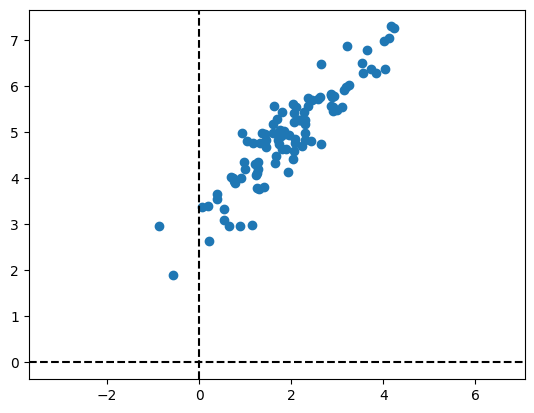

In [211]:
plt.scatter(X[0, : ], X[1, : ])
plt.axis('equal')
plt.axhline(color = 'black', linestyle = '--')
plt.axvline(color = 'black', linestyle = '--')

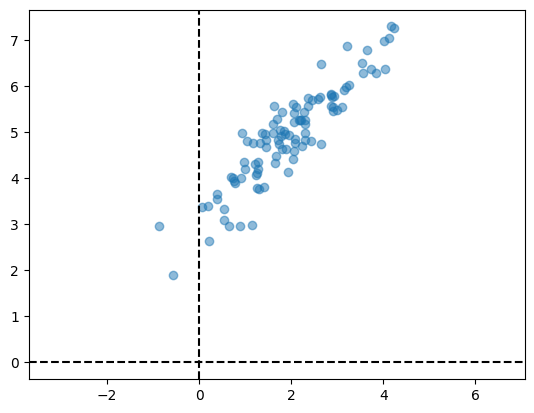

In [212]:
# STEP 2 : Visualise
def plot(X) :
  plt.scatter(X[0, : ], X[1, : ], alpha = 0.5)
  # alpha controls opacity of the points
  plt.axhline(color = 'black', linestyle = '--')
  plt.axvline(color = 'black', linestyle = '--')
  plt.axis('equal')

plot(X)

## Center the dataset

Text(0.5, 1.0, 'Centered')

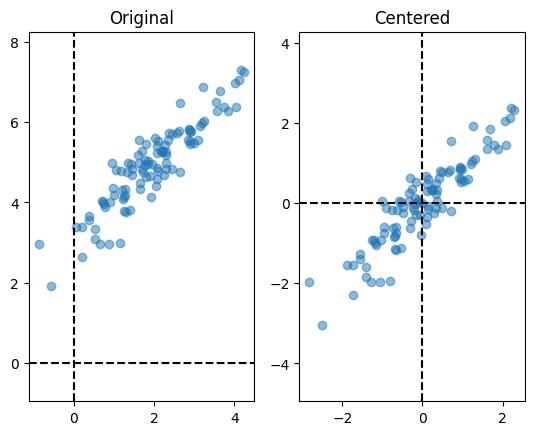

In [213]:
# STEP 3 : Center

def center(X) :
  mu = np.mean(X, axis =1)
  X -= mu.reshape(2,1)
  return X

# Original
plt.subplot(1,2,1)
plot(X)
plt.title('Original')

# After centering the dataset
plt.subplot(1,2,2)
X = center(X)
plot(X)
plt.title('Centered')

## Covariance Matrix

Formulae for the covariance matrix :   (XX^T)/n

In [214]:
C = (X @ X.T)/n
C

array([[1.10392963, 1.01510591],
       [1.01510591, 1.11568365]])

In [215]:
# STEP 4 : Finding the covariance matrix

def covariance(X) :
  d, n = X.shape
  return (X @ X.T)/n

covariance(X)

array([[1.10392963, 1.01510591],
       [1.01510591, 1.11568365]])

## Principal Components


`All that remains to find the eigenvectors of the covariance matrix, whcih are our principal components`

In [216]:
eigval, eigvec = np.linalg.eigh(C)

eigval, eigvec

(array([0.09468372, 2.12492955]),
 array([[-0.70915071,  0.70505693],
        [ 0.70505693,  0.70915071]]))

In [227]:
# STEP 5 : Finding eigenvalues & eigenvectors

def get_PC(C) :
  eigval, eigvec = np.linalg.eigh(C)
  eigval = np.flip(eigval)
  eigvec = np.flip(eigvec, axis = 1)
  return eigval, eigvec

var, pcs = get_PC(C)

print(f"First principal component (PC) : {pcs[ : , 0]}")
print(f"Variance along first PC : {var[0]}\n")
print(f"Second principal component (PC) : {pcs[ : , 1]}")
print(f"Variance along second PC : {var[1]}")


First principal component (PC) : [0.70505693 0.70915071]
Variance along first PC : 2.1249295536957673

Second principal component (PC) : [-0.70915071  0.70505693]
Variance along second PC : 0.0946837185004355


In [234]:
variance , pcs = get_PC(C)
variance
pcs


print(f"First principal comp : {pcs[ : , 0]}")
print(f"Second principal comp : {pcs[ : , 1]}")
print(f"Variance along PC1 : {variance[0]}")
print(f"Variance along PC2 : {variance[1]}")

First principal comp : [0.70505693 0.70915071]
Second principal comp : [-0.70915071  0.70505693]
Variance along PC1 : 2.1249295536957673
Variance along PC2 : 0.0946837185004355


In [237]:
# Demo of flip

A = np.array([
    [1,2,3],
    [4,5,6]
])
A = np.flip(A, axis = 1)
A

array([[3, 2, 1],
       [6, 5, 4]])

## Visualize PCs

In [246]:
# y = mx (equation of a line)
# m = y/x (get the slope of a line)

In [253]:
# In PC1 the first element is x and second element is y. We have to find m = y/x
m1 = (pcs[ : , 0][1]) / (pcs[ : , 0][0])
m1

np.float64(1.0058063124869856)

In [255]:
m2 = (pcs[ : , 1][1]) / (pcs[ : , 1][0])
m2

np.float64(-0.9942272061579842)

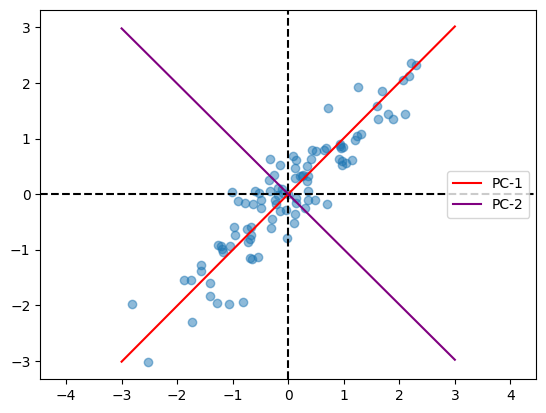

In [273]:
plot(X)
x = np.linspace(-3,3)
plt.plot(x, m1 * x, color = 'red', label = 'PC-1')
plt.plot(x, m2 * x, color = 'purple', label = 'PC-2')
plt.legend()

### Practice

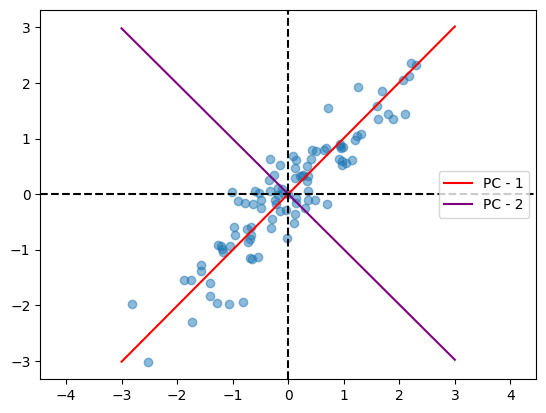

In [275]:
m1 = (pcs[ : , 0][1]) / (pcs[ : , 0][0])
m2 = (pcs[ : , 1][1]) / (pcs[ : , 1][0])


x = np.linspace(-3, 3)
plt.plot(x, m1 * x, color = 'red', label = 'PC - 1')   # y = m x
plt.plot(x, m2 * x, color = 'purple', label = 'PC - 2')
plot(X)
plt.legend()

## `SUMMARY`

Now, we summarize all that we have done above and express in the form of two functions

In [278]:
def PCA(X) :
  d, n = X.shape
  # Center
  X -= np.mean(X, axis=1).reshape(2,1)
  # Covariance
  C = (X @ X.T)/n
  # eigval, eigvec
  eigval , eigvec = np.linalg.eigh(C)
  eigval = np.flip(eigval)
  eigvec = np.flip(eigvec)
  return eigval, eigvec

In [292]:
def PLOT(X, pc) :
  # Plot the data
  plt.scatter(X[0 , : ], X[1 , : ], alpha = 0.5)
  plt.axhline(color = 'black', linestyle = '--')
  plt.axvline(color = 'black', linestyle = '--')

  # Plot the PCs
  x = np.linspace(-3, 3)
  plt.plot(x, ((pc[ : , 0][1]) / (pc[ : , 0][0])) * x,
           color = 'red', label = 'PC - 1')
  plt.plot(x, ((pc[ : , 1][1]) / (pc[ :,  1][0])) * x,
           color = 'purple', label = 'PC - 2')
  plt.legend()
  plt.axis('equal')

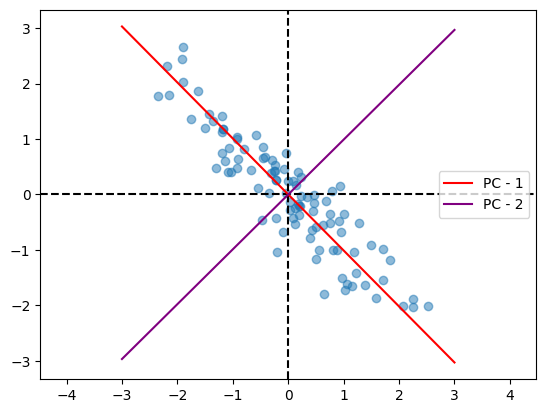

In [293]:
mu = np.array([2,5])
cov = np.array([
    [1, -0.9],
    [-0.9, 1]
])
n = 100
X = generate(mu, cov, n)
var, pcs = PCA(X)
PLOT(X, pcs)